In [ ]:
"""
kaggle家得宝产品搜索相关性
https://www.kaggle.com/c/home-depot-product-search-relevance/data
"""

# 1.导入所需
# 所有要用到的库
import numpy as np
import pandas as pd
from nltk.stem import SnowballStemmer	# 获取词干

In [3]:
# from utils import IOUtils
# df_train=pd.read_csv(IOUtils.get_path_sources("train.csv","home-depot-product-search-relevance"))
# df_test=pd.read_csv(IOUtils.get_path_sources("test.csv","home-depot-product-search-relevance"))
# df_desc=pd.read_csv(IOUtils.get_path_sources("product_descriptions.csv","home-depot-product-search-relevance"))
# 读入训练测试集
df_train = pd.read_csv("../sources/home-depot-product-search-relevance/train.csv", encoding="ISO-8859-1")
df_test = pd.read_csv("../sources/home-depot-product-search-relevance/test.csv", encoding="ISO-8859-1")
# 这里还有个产品介绍
df_desc = pd.read_csv("../sources/home-depot-product-search-relevance/product_descriptions.csv")

In [4]:
# 看看数据都长甚麽样
df_train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [5]:
df_test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [6]:
df_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
# 看來不要做太多的复杂处理,我们于是直接合并训练/测试集,以便于统一做进一步的文本预处理
# 合并成一个,顺序没有改变,上面是训练集,下面是测试集
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df_all.head()

,id,product_title,product_uid,relevance,search_term
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet


In [8]:
# 产品介绍合并到一起
df_all = pd.merge(df_all, df_desc, how="left", on="product_uid")
df_all.head()
# 好了,现在我们得到一个全体的数据大表格

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [ ]:
# 2.文本预处理
# 这里文本预处理比较简单,因为最主要的就是看关键词是否会被包含.
# 所以我们统一化我们的文本内容,以达到任何term在我们的数据集中只有一种表达式的效果.
# 我们这里用简单的Stem做个例子:
# (有兴趣的同学可以选用各种你觉得靠谱的预处理方式:去掉停止词,纠正拼写,去掉数字,去掉各种emoji,等等)

stemmer = SnowballStemmer("english")
# 转化小写并将多个空格转化为1个空格
def str_stemmer(s):
	return " ".join((stemmer.stem(word) for word in s.strip().lower().split()))

# 接下來,把每一个column都跑一遍,以清洁所有的文本内容
df_all["search_term"] = df_all["search_term"].map(lambda x: str_stemmer(x))
df_all["product_title"] = df_all["product_title"].map(lambda x: str_stemmer(x))
df_all["product_description"] = df_all["product_description"].map(lambda x: str_stemmer(x))
df_all.head()

In [11]:
# 3.自制文本特征
# 一般属于一种脑洞大开的过程,想到甚麽可以加甚麽.
# 当然,特征也不是越丰富越好,稍微靠谱点是肯定的

# 关键词的长度
df_all["len_of_query"] = df_all["search_term"].map(lambda x: len(x.split())).astype(np.int64)
df_all.dtypes

id                       int64
product_title           object
product_uid              int64
relevance              float64
search_term             object
product_description     object
len_of_query             int64
dtype: object

In [12]:
# 为了计算 关键词 的有效性,我们可以native地直接看 出现了多少次
def str_common_word(str1, str2):
	return sum(int(str2.find(word) > 0) for word in str1.split())

# 标题中有多少关键词重合
df_all["commons_in_title"] = df_all.apply(lambda x: str_common_word(x["search_term"], x["product_title"]), axis=1)
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,len_of_query,commons_in_title
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",2,1
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",2,1
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,2,1
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,3,1
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,3,3


In [13]:
# 描述中有多少关键词重合
df_all["commons_in_desc"] = df_all.apply(lambda x: str_common_word(x["search_term"], x["product_description"]), axis=1)
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description,len_of_query,commons_in_title,commons_in_desc
0,2,simpson strong-ti 12-gaug angl,100001,3.00,angl bracket,"not onli do angl make joint stronger, they als...",2,1,1
1,3,simpson strong-ti 12-gaug angl,100001,2.50,l bracket,"not onli do angl make joint stronger, they als...",2,1,1
2,9,behr premium textur deckov 1-gal. #sc-141 tugb...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,2,1,1
3,16,delta vero 1-handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom with the delta vero single...,3,1,1
4,17,delta vero 1-handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom with the delta vero single...,3,3,2


In [14]:
# 等等等等...变着法子想出些数字能代表的feature,一股脑放进來.
# 搞完之後,我们把不能被<机器学习模型>处理的column给drop掉
df_all = df_all.drop(["search_term", "product_title", "product_description"], axis=1)
df_all.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2


In [15]:
# 4.重朔训练/测试集
# 舒淇说得好,要把之前脱掉的衣服再一件件穿回來.
# 数据处理也是如此,搞完一圈预处理之後,我们让数据重回原本的面貌

# 分开训练和测试集
df_train = df_all.loc[df_train.index]
df_train.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2


In [16]:
# 这里需要接着训练集的角标,获取测试集的数据
beginindex = df_train.shape[0]
df_test = df_all.loc[np.arange(beginindex, beginindex + df_test.shape[0], 1)]
df_test.head()

,id,product_uid,relevance,len_of_query,commons_in_title,commons_in_desc
74067,1,100001,NaN,3,0,1
74068,4,100001,NaN,3,1,1
74069,5,100001,NaN,3,0,1
74070,6,100001,NaN,3,1,2
74071,7,100001,NaN,4,1,2


In [17]:
# 记录下测试集的id
# 留着上传的时候能对的上号
test_ids = df_test["id"]
test_ids.head()

74067          1
74068          4
74069          5
74070          6
74071          7
74072          8
74073         10
74074         11
74075         12
74076         13
74077         14
74078         15
74079         19
74080         22
74081         24
74082         25
74083         26
74084         28
74085         29
74086         30
74087         31
74088         32
74089         33
74090         36
74091         39
74092         40
74093         41
74094         42
74095         43
74096         44
           ...  
240730    240731
240731    240732
240732    240733
240733    240734
240734    240735
240735    240736
240736    240737
240737    240738
240738    240739
240739    240740
240740    240741
240741    240742
240742    240743
240743    240744
240744    240745
240745    240746
240746    240747
240747    240748
240748    240749
240749    240750
240750    240751
240751    240752
240752    240753
240753    240754
240754    240755
240755    240756
240756    240757
240757    2407

In [18]:
# 分离出y_train,得到ndarray类型的数据
y_train = df_train["relevance"].values
y_train

array([ 3.  ,  2.5 ,  3.  , ...,  2.33,  3.  ,  2.33])

In [19]:
# 把原集中的label给删去
# 否则就是cheating了
X_train = df_train.drop(["id", "relevance"], axis=1).values
X_train

array([[100001,      2,      1,      1],
       [100001,      2,      1,      1],
       [100002,      2,      1,      1],
       ..., 
       [206641,      7,      1,      4],
       [206648,      3,      2,      2],
       [206650,      5,      3,      2]], dtype=int64)

In [20]:
X_test = df_test.drop(["id", "relevance"], axis=1).values
X_test

array([[100001,      3,      0,      1],
       [100001,      3,      1,      1],
       [100001,      3,      0,      1],
       ..., 
       [224426,      1,      1,      1],
       [224427,      2,      2,      2],
       [224428,      4,      3,      2]], dtype=int64)

In [21]:
# 5.建立模型
# 我们用个最简单的模型,Ridge回归模型
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [22]:
# 用CV结果保证公正客观性,并调试不同的alpha值
params = [1, 3, 5, 6, 7, 8, 9, 10]
test_scores = []
for param in params:
	clf = RandomForestRegressor(n_estimators=30, max_depth=param)
	# 这里cross_val_score得到的时负数
	test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
	test_scores.append(np.mean(test_score))
test_scores

[0.53475972051029541,
 0.51749996877747706,
 0.50046756140077764,
 0.49507013953132145,
 0.49576680197153744,
 0.49849409451030963,
 0.50158913379534387,
 0.50913901428528396]

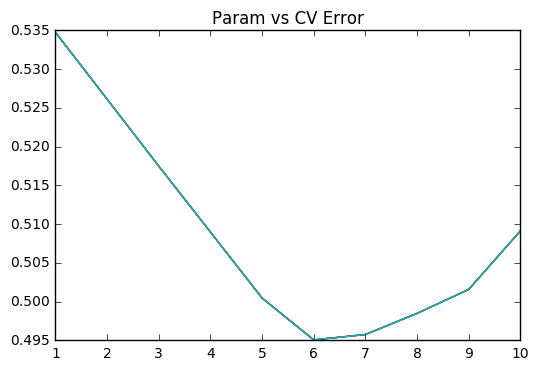

In [26]:
# 画个图來看看
import matplotlib.pyplot as plt

# %matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV Error")
# 大概6~7的时候达到最优解
plt.show()

In [27]:
# 6.上传结果
# 用我们测试出的最优解建立模型,并跑跑测试集
rf = RandomForestRegressor(n_estimators=30, max_depth=6)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
y_pred=rf.predict(X_test)
y_pred

array([ 2.1400449 ,  2.33230133,  2.1400449 , ...,  2.1829849 ,
        2.40541736,  2.27783287])

In [29]:
# 把拿到的结果,放进PD,做成CSV上传
pd.DataFrame({"id":test_ids,"relevance":y_pred}).to_csv("../wkztarget/submission.csv",index=False)

# 总结:
# 这一篇教程中,虽然都是用的最简单的方法,但是基本框架是很完整的
# 同学们可以尝试修改/调试/升级的部分是:
# 1.文本预处理步骤:你可以使用很多不同的方法來使得文本数据变得更加清洁
# 2.自制的特征:相处更多的特征值表达方法(关键词全段重合数量,重合比率,等等)
# 3.更好的回归模型:根据之前的课讲的Ensemble方法,把分类器提升到极致